***Проект "Управление рисками в молочном хозяйстве"***

***Цель проекта: разработка модели машинного обучения, с помощью которой можно отобрать для покупки коров по двум критериям:
средний удой за год — не менее 6000 килограммов, молоко должно быть вкусным.***

**Этапы выполнения проекта:**

<a href='#chapter_1'>1. Загрузка данных и библиотек, предобработка данных.</a>

 1.1 загрузка датасетов и библиотек,

 1.2 получение общей информации о датасетах,

 1.3. исправление ошибок заполнения данных - поиск и устранение пропусков и дубликатов, изменение формата данных и т.д.


<a href='#chapter_2'> 2. Исследовательский анализ данных.</a>

 2.1 оценка статистических данных по признакам, поиск и удаление выбросов и аномалий,

 2.2 визуализация статистических закономерностей на графиках


<a href='#chapter_3'> 3. Корреляционный анализ.</a>

 3.1. расчет коэффициентов корреляции для количественных признаков,

 3.2. выявление признаков, наиболее сильно связанных с таргетным,

 3.3. построение графиков, визуализирующих связи между количественным признаками с учетом влияния на них категориальных


<a href='#chapter_3'> 4. Обучение модели линейной регрессии.</a>

 4.1. подготовка данных -масштабирование и кодирование признаков,

 4.2. составление первой модели линейной регрессии на входных признаках,

 4.3. оценка метрик первой модели, коррекция признаков для их улучшения,

 4.4. составление второй модели линейной регрессии на обработанных признаках,

 4.5. оценка метрик второй модели, добавление нового признака для их улучшения,

 4.6. составление третьей модели линейной регрессии, оценка ее метрик и доверительного интервала прогноза,

 4.7. составление модели для датасета с коровами для покупки, прогноз удоя для всех коров


<a href='#chapter_3'> 5. Обучение модели логистической регрессии.</a>

 5.1. подготовка данных - масштабирование и кодирование признаков,

 5.2. составление модели логистической регрессии для прогнозирования вкуса молока,

 5.3. обучение модели на всех имеющихся в датасете данных, получение метрик работы модели,

 5.4. выбор подходящей бизнес-метрики, изменение порога в модели для достижения оптимального уровня метрики,

 5.5. получение предсказания по вкусу молока на обученной модели,

 5.6. внесение предсказаний в датасет, определение коров, соответствующих критериям.


<a href='#chapter_3'> 6. Итоговые выводы.</a>

составление общего вывода по проекту,

рекомендации фермеру по оптимизации данных для улушения качества прогноза

## 1. Загрузка данных и библиотек

<a id='chapter_1'></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, \
recall_score, precision_score

In [ ]:
ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal = ',')
ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';', decimal = ',')
cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal = ',')

##  Предобработка данных

In [ ]:
ferma_main.head(5)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [ ]:
ferma_dad.head(5)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
cow_buy.head(5)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


приведем названия столбцов в датафреймах в подходящий вид (на английском языке, строчными буквами)

In [ ]:
ferma_main.columns = ['id', 'milk_yield', 'feed_unit', 'raw_protein', 'sugar_protein_attitude', 'breed', 'pasture_type', \
                      'father_breed', 'fat_content', 'protein', 'taste', 'age']

In [ ]:
ferma_main.head(5)

,id,milk_yield,feed_unit,raw_protein,sugar_protein_attitude,breed,pasture_type,father_breed,fat_content,protein,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [ ]:
ferma_dad.columns = ['id', 'father_name']

In [ ]:
ferma_dad.head(5)

,id,father_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
cow_buy.columns = ['breed', 'pasture_type', 'father_breed', 'father_name', 'fat_content', 'protein', 'age']

In [ ]:
cow_buy.head(5)

,breed,pasture_type,father_breed,father_name,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [ ]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      634 non-null    int64  
 1   milk_yield              634 non-null    int64  
 2   feed_unit               634 non-null    float64
 3   raw_protein             634 non-null    int64  
 4   sugar_protein_attitude  634 non-null    float64
 5   breed                   634 non-null    object 
 6   pasture_type            634 non-null    object 
 7   father_breed            634 non-null    object 
 8   fat_content             634 non-null    float64
 9   protein                 634 non-null    float64
 10  taste                   634 non-null    object 
 11  age                     634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [ ]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   pasture_type  20 non-null     object 
 2   father_breed  20 non-null     object 
 3   father_name   20 non-null     object 
 4   fat_content   20 non-null     float64
 5   protein       20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [ ]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           629 non-null    int64 
 1   father_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


пропусков в датасетах нет, но в таблице с информацией о папах на 5 строк меньше, чем в основном датасете, возможно это дубликаты. После корректировки в параметрах загрузки числовые данные сразу загрузились как числовые, переводить ничего не требуется.

In [ ]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      634 non-null    int64  
 1   milk_yield              634 non-null    int64  
 2   feed_unit               634 non-null    float64
 3   raw_protein             634 non-null    int64  
 4   sugar_protein_attitude  634 non-null    float64
 5   breed                   634 non-null    object 
 6   pasture_type            634 non-null    object 
 7   father_breed            634 non-null    object 
 8   fat_content             634 non-null    float64
 9   protein                 634 non-null    float64
 10  taste                   634 non-null    object 
 11  age                     634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [ ]:
cow_buy = cow_buy.replace(regex={',': '.'}).astype({'fat_content':'float', 'protein':'float'}, errors = 'ignore')

In [ ]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   pasture_type  20 non-null     object 
 2   father_breed  20 non-null     object 
 3   father_name   20 non-null     object 
 4   fat_content   20 non-null     float64
 5   protein       20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Теперь проверим дубликаты

In [ ]:
ferma_main.duplicated().sum()

5

In [ ]:
ferma_main = ferma_main.drop_duplicates()

Явные дубликаты удалили, теперь количество строк в основном датасете и в данных о быках-папах выровнялось. Проверим неявные дубликаты

In [ ]:
ferma_main['breed'].sort_values().unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [ ]:
ferma_main['pasture_type'].sort_values().unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [ ]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace(regex={'Равнинные': 'Равнинное'}).str.lower()

<ipython-input-200-5c1d2711eb0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferma_main['pasture_type'] = ferma_main['pasture_type'].replace(regex={'Равнинные': 'Равнинное'}).str.lower()


In [ ]:
ferma_main['pasture_type'].sort_values().unique()

array(['равнинное', 'холмистое'], dtype=object)

In [ ]:
ferma_main['father_breed'].sort_values().unique()

array(['Айдиал', 'Айдиалл', 'Соверин'], dtype=object)

In [ ]:
ferma_main['father_breed'].value_counts()

Соверин    311
Айдиал     240
Айдиалл     78
Name: father_breed, dtype: int64

In [ ]:
ferma_main['father_breed'] = ferma_main['father_breed'].replace(regex={'Айдиалл': 'Айдиал'})

<ipython-input-204-b56dff236a62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferma_main['father_breed'] = ferma_main['father_breed'].replace(regex={'Айдиалл': 'Айдиал'})


In [ ]:
ferma_main['father_breed'].sort_values().unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [ ]:
ferma_main['taste'].sort_values().unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [ ]:
ferma_main['age'].sort_values().unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

В основном датасете неявные дубликаты нашлись в 2 столбцах- тип пастбища и порода, устранили их.

In [ ]:
cow_buy['breed'].sort_values().unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [ ]:
cow_buy['pasture_type'].sort_values().unique()

array(['равнинное', 'холмистое'], dtype=object)

In [ ]:
cow_buy['father_breed'].sort_values().unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [ ]:
cow_buy['father_name'].sort_values().unique()

array(['Барин', 'Буйный', 'Геркулес', 'Соловчик'], dtype=object)

In [ ]:
cow_buy['age'].sort_values().unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [ ]:
ferma_dad['father_name'].sort_values().unique()

array(['Барин', 'Буйный', 'Геркулес', 'Соловчик'], dtype=object)

С остальными столбцами все в порядке, неявных дубликатов нет.

**Вывод по разделу:** проведена загрузка данных и библиотек, первичный анализ данных и предобработка. Столбцы переименованы с целью приведения к единому виду. Удалены дубликаты, устранены ошибки в данных.

## 2. Исследовательский анализ данных

<a id='chapter_2'></a>

Посмотрим, есть ли выбросы в данных, т.к. данные признаки будут использованы для построения моделей, выбросов в них быть не должно. Составлять гистрограммы и боксплоты для многих признаков сразу удобнее с помощью функции.

In [ ]:
def todoplot(df):
    for i in col:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
        ax1.hist(df[i], bins=10);
        ax1.set_title(i)
        ax1.set_ylabel('Количество')
        ax2.boxplot(df[i]);
        ax2.set_title(i)
        plt.show()

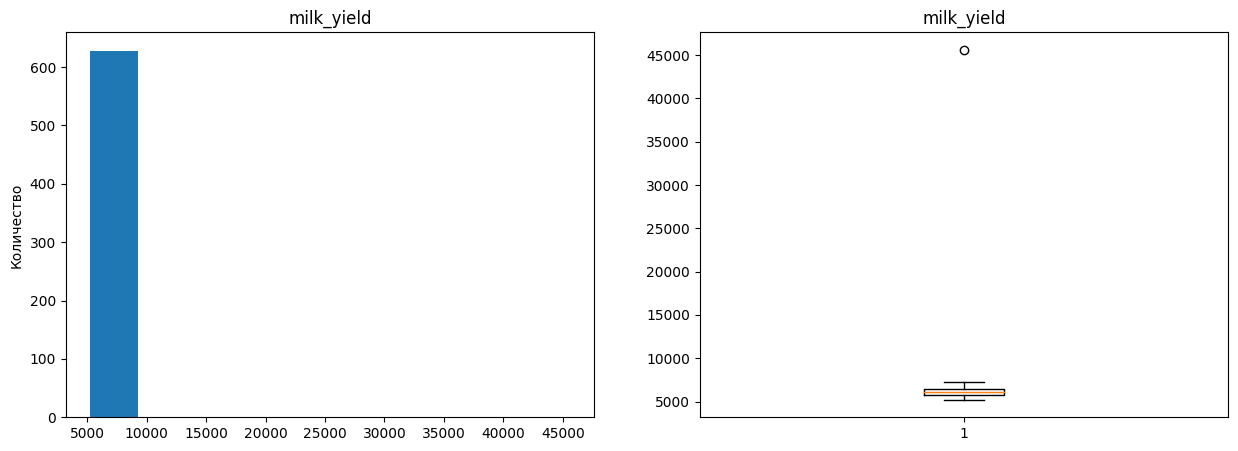

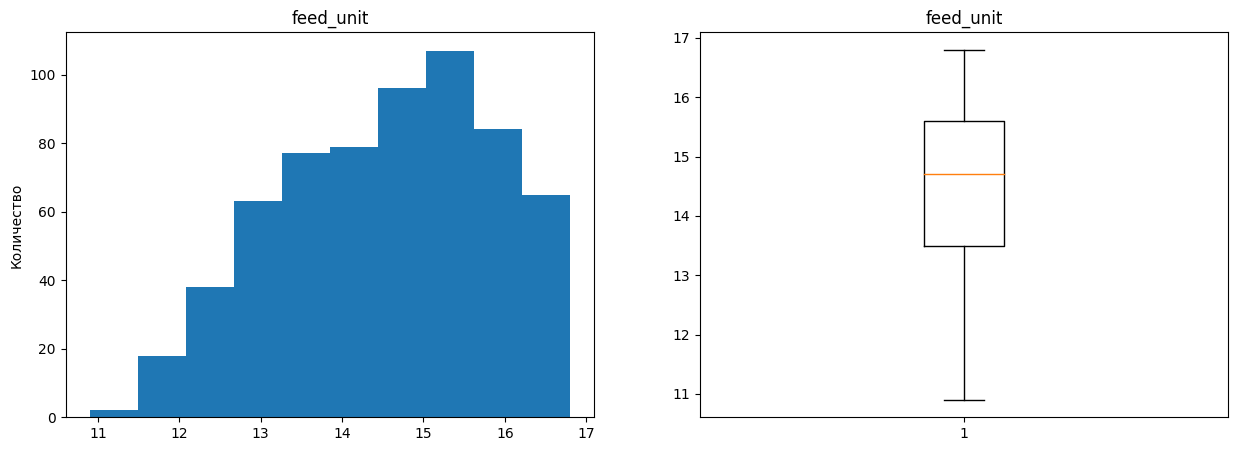

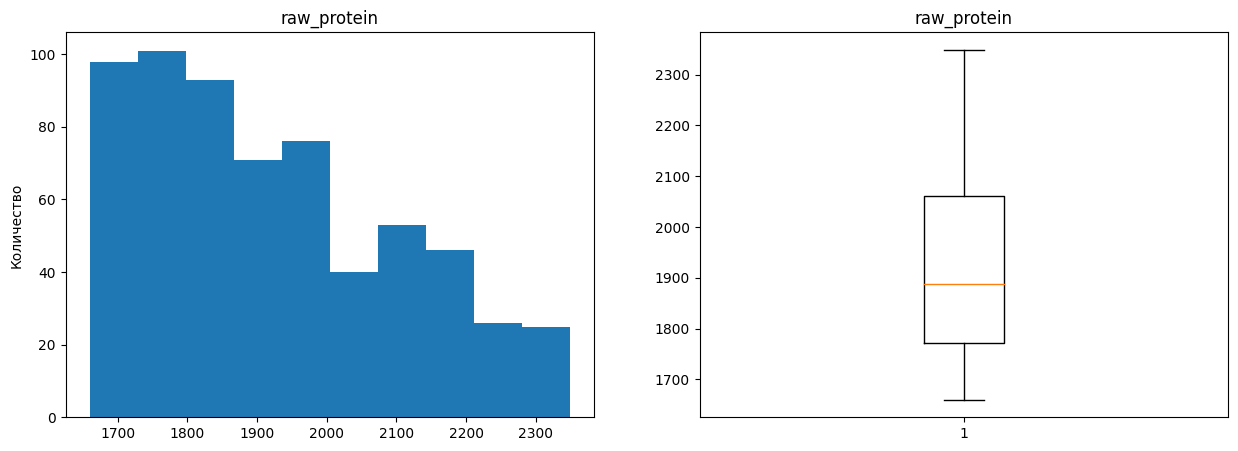

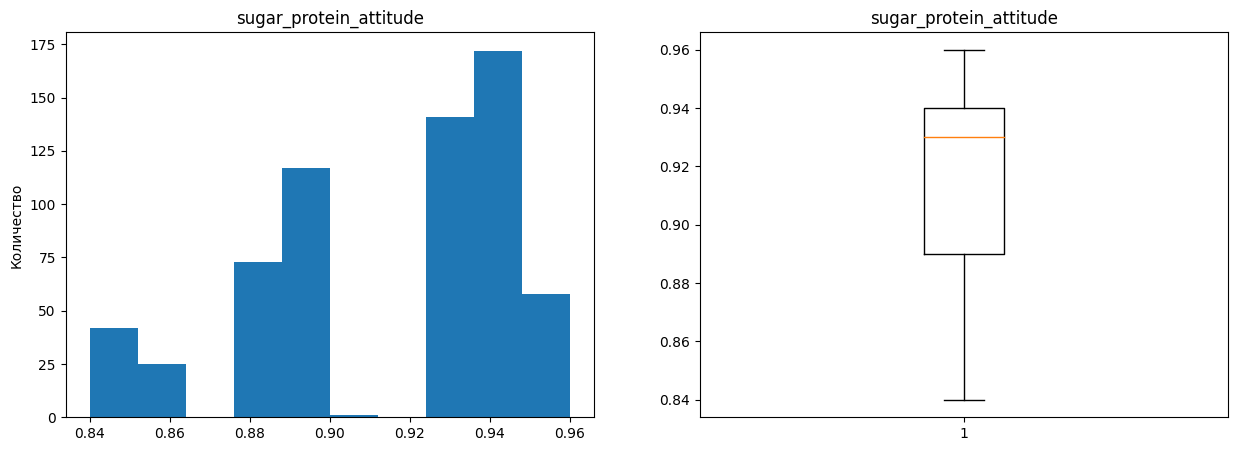

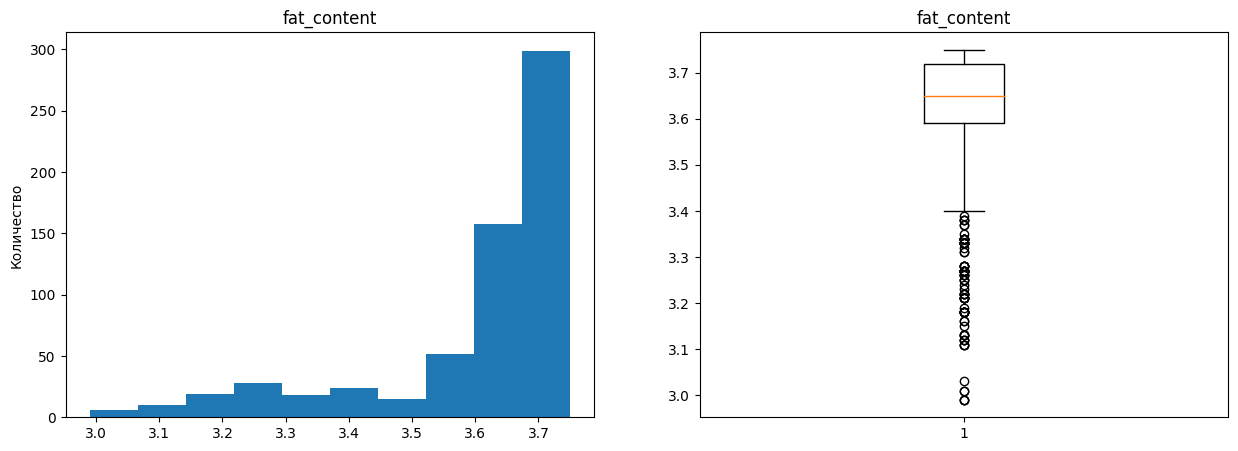

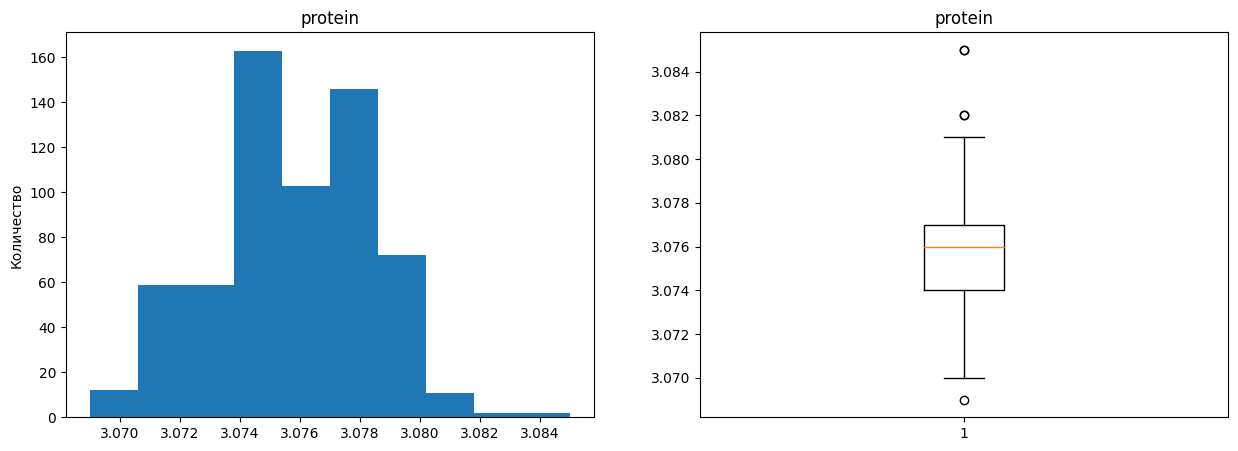

In [ ]:
col = ['milk_yield', 'feed_unit', 'raw_protein', 'sugar_protein_attitude', 'fat_content', 'protein']
todoplot(ferma_main)

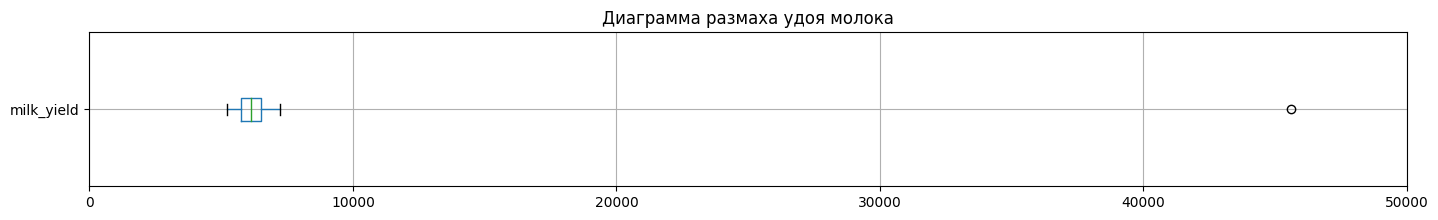

In [ ]:
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['milk_yield']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха удоя молока')
ax.set_xlim(0, 50000);

In [ ]:
ferma_main['milk_yield'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield, dtype: float64

в столбце с удоем есть явно выбивающееся значение 45616кг, найдем эту строку и удалим. Строку с этим же id удалим в датасете с отцами. Кроме того, обращает на себя внимание что признак sugar_protein_attitude распределен на несколько отдельных групп, которые можно объединить в 2 основные группы, что будет сделано далее. Жирность молока распределена тоже неравномерно, с выраженным преобладанием максимальной жирности. Ближе других к нормальному распределение признака protein. Показатель raw_protein имеет смещенное распределение и тенденцию к снижению.

In [ ]:
ferma_main.query('milk_yield>10000')

,id,milk_yield,feed_unit,raw_protein,sugar_protein_attitude,breed,pasture_type,father_breed,fat_content,protein,taste,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [ ]:
ferma_main = ferma_main[ferma_main.id != 17]

In [ ]:
ferma_main.describe()

,id,milk_yield,feed_unit,raw_protein,sugar_protein_attitude,fat_content,protein
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Наш первый целевой признак - удой молока, судя по статистическому распределению, только половина коров дают удой более 6000кг (и средняя и медиана признака только немного выходят за целевой уровень), при этом максимально возможное количество молока 7200кг.Эту же динамику мы видим и на графике ниже. Далее мы посмотрим коррелляции между целевым и другими входными признаками.

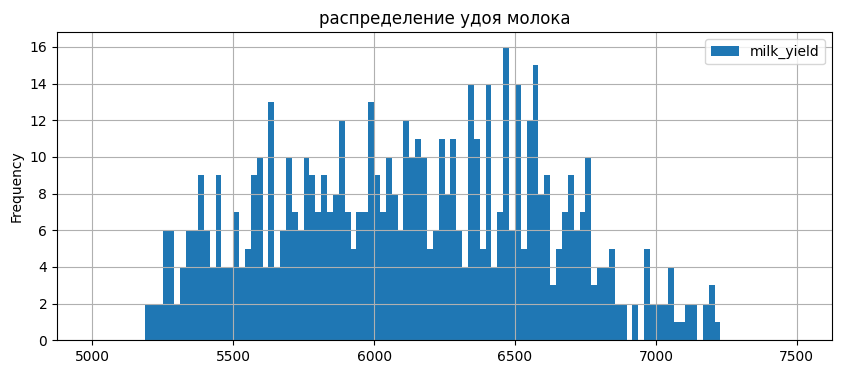

In [ ]:
ferma_main.plot(kind='hist', title='распределение удоя молока', y='milk_yield', \
                  bins=120, grid=True, figsize=(10,4), range=(5000,7500) );

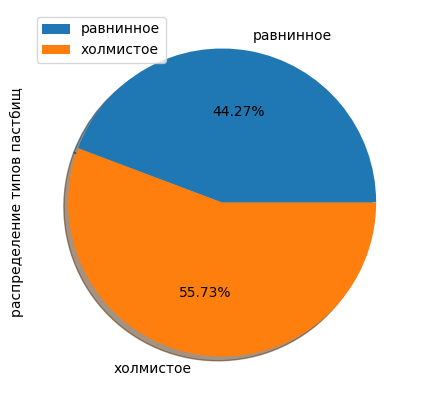

In [ ]:
ferma_main.groupby(['pasture_type']).count().plot.pie(y='id', ylabel='распределение типов пастбищ',\
                                                      autopct='%1.2f%%', figsize=(5,5), shadow=True)
plt.legend(loc='upper left');

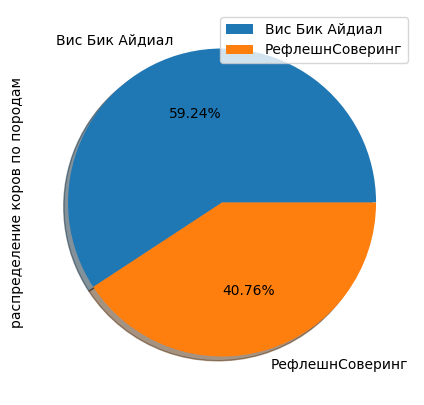

In [ ]:
ferma_main.groupby(['breed']).count().plot.pie(y='id', ylabel='распределение коров по породам',\
                                                      autopct='%1.2f%%', figsize=(5,5), shadow=True);
plt.legend(loc='upper right');

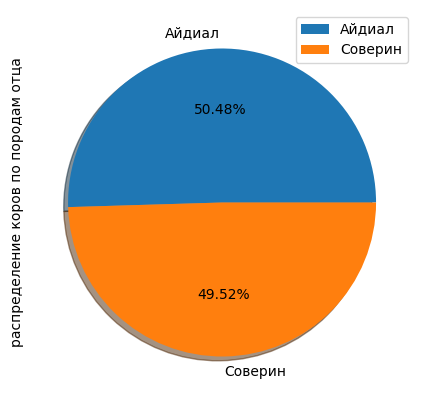

In [ ]:
ferma_main.groupby(['father_breed']).count().plot.pie(y='id', ylabel='распределение коров по породам отца',\
                                                      autopct='%1.2f%%', figsize=(5,5), shadow=True);


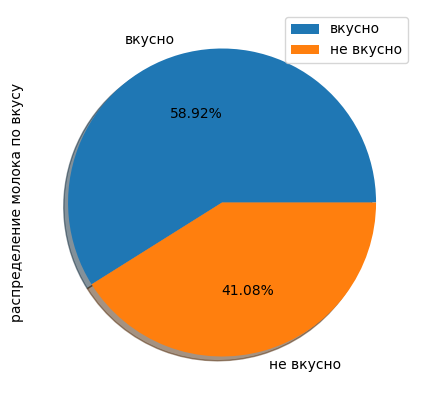

In [ ]:
ferma_main.groupby(['taste']).count().plot.pie(y='id', ylabel='распределение молока по вкусу',\
                                                      autopct='%1.2f%%', figsize=(5,5), shadow=True);


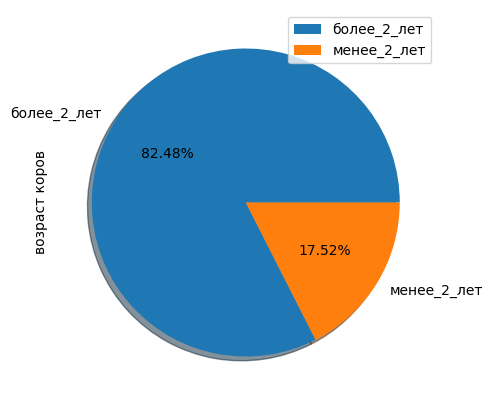

In [ ]:
ferma_main.groupby(['age']).count().plot.pie(y='id', ylabel='возраст коров',\
                                                      autopct='%1.2f%%', figsize=(5,5), shadow=True);


при анализе качественных признаков видим что с отрывом 11% преобладают холмистые пастбища, коров породы Вис Бик Айдиал почти на 20% больше чем Рефлешн Соверинг, породы отцов распределены практически поровну, доля вкусного молока составила почти 59%, а коровы старше 2 лет составляют подавляющее большинство (82,4%).

**Вывод по разделу:** проведен исследовательский анализ данных, изучены статистические закономерности, удалены выбросы. Установлено, что  признак sugar_protein_attitude распределен на несколько отдельных групп, которые можно объединить в 2 основные группы. Жирность молока распределена тоже неравномерно, с выраженным преобладанием максимальной жирности. Ближе других к нормальному распределение признака protein. Показатель raw_protein имеет смещенное распределение и тенденцию к снижению. Наш первый целевой признак - удой молока, судя по статистическому распределению, только половина коров дают удой более 6000кг (и средняя и медиана признака только немного выходят за целевой уровень), при этом максимально возможное количество молока 7200кг. При анализе качественных признаков видим что с отрывом 11% преобладают холмистые пастбища, коров породы Вис Бик Айдиал почти на 20% больше чем Рефлешн Соверинг, породы отцов распределены практически поровну, доля вкусного молока составила почти 59%, а коровы старше 2 лет составляют подавляющее большинство (82,4%).

## 3. Корреляционный анализ

<a id='chapter_3'></a>

Посмотрим на тепловой карте общую картину корреляций в основном датасете. Т.к. данные ненормально распределены, используем коэффициент корреляции Спирмена.

<ipython-input-227-1fff15152bff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ferma_main.query('taste=="вкусно"').corr(method = 'spearman'), annot=True, fmt='.2f');


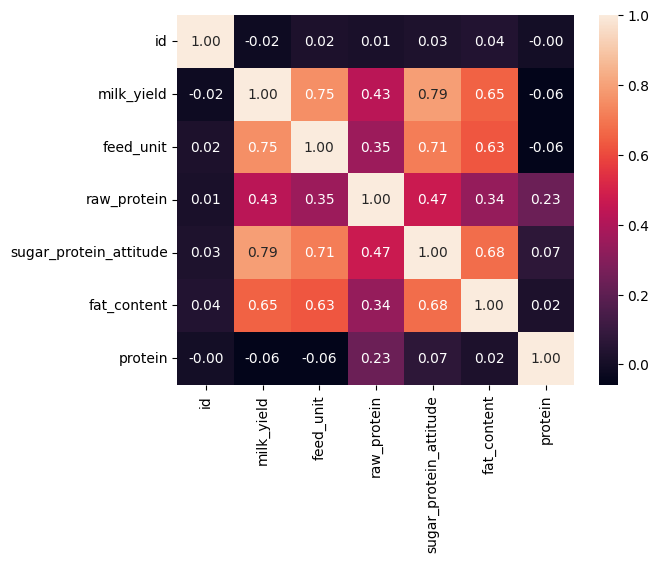

In [ ]:
sns.heatmap(ferma_main.query('taste=="вкусно"').corr(method = 'spearman'), annot=True, fmt='.2f');

<ipython-input-228-f04be5d4dc83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ferma_main.query('taste=="не вкусно"').corr(method = 'spearman'), annot=True, fmt='.2f');


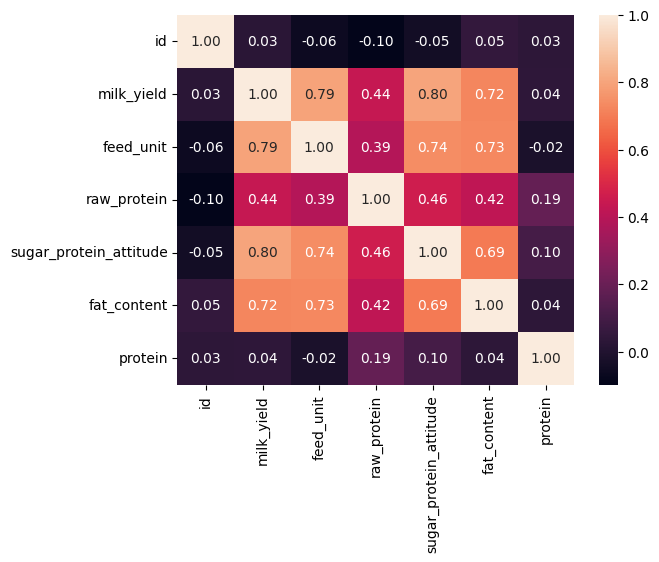

In [ ]:
sns.heatmap(ferma_main.query('taste=="не вкусно"').corr(method = 'spearman'), annot=True, fmt='.2f');

коэффициенты корреляции посчитала отдельно для коров с внусным и невкусным молоком, разница в коэффициентах варьирует в пределах 0,02-0,08, максимальная разница  у признака жирность минимальная у сырого протеина.  

На карте видно сильную положительную корреляцию удоя молока с питательной ценностью корма, сахарно-протеиновым отношением корма и умеренную силу связи с содержанием сырого протеина в корме.  Рассуждая логически, удой молока зависит от характеристик корма, возможно от типа пастбища и породы коровы. Обращает на себя внимание также сильная прямая связь между feed_unit и sugar_protein_attitude, оба эти признака отражают питательную ценность корма и при обучении модели могут сработать как мультиколлинеарные. Возможно один из них мы исключим из модели. Изучим взаимосвязь между целевым и входными признаками с учетом данных категориальных признаков.

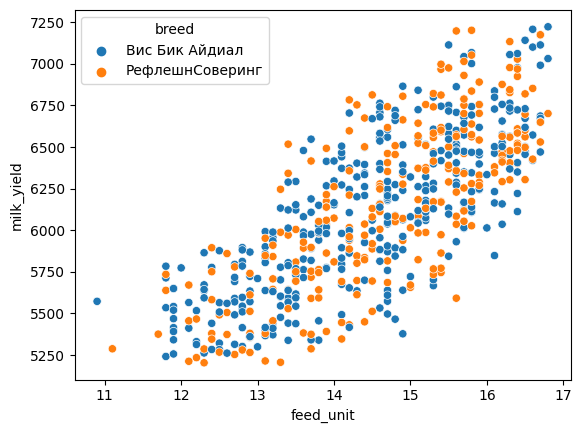

In [ ]:
sns.scatterplot(x='feed_unit', y='milk_yield', data=ferma_main, hue='breed');

отчетливого влияния породы на удой молока на графике не прослеживается

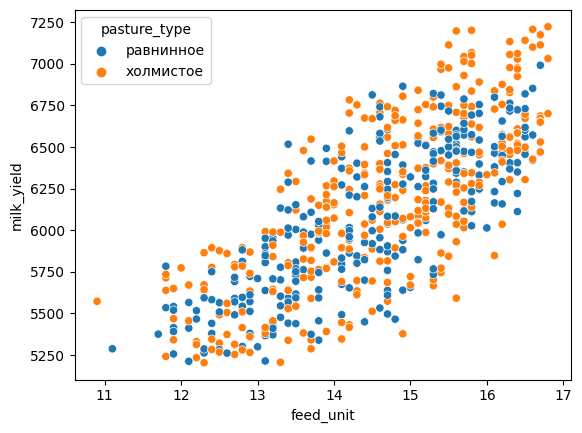

In [ ]:
sns.scatterplot(x='feed_unit', y='milk_yield', data=ferma_main, hue='pasture_type');

наблюдается преобладание коров с максмальным удоем на пастбищах холмистого типа

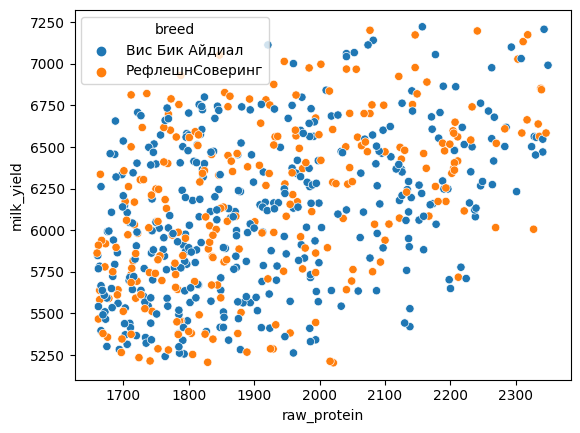

In [ ]:
sns.scatterplot(x='raw_protein', y='milk_yield', data=ferma_main, hue='breed');

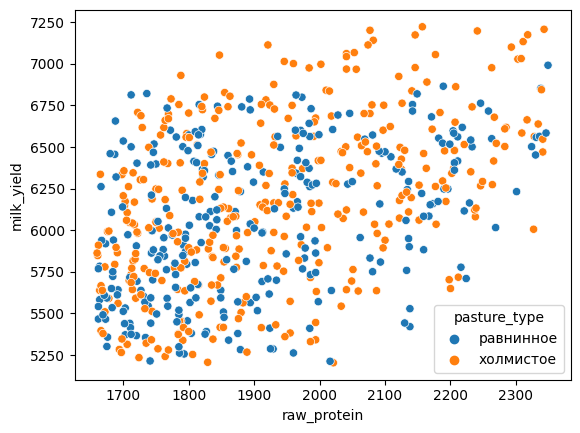

In [ ]:
sns.scatterplot(x='raw_protein', y='milk_yield', data=ferma_main, hue='pasture_type');

корреляция удоя с уровнем сырого протеина в корме менее заметная

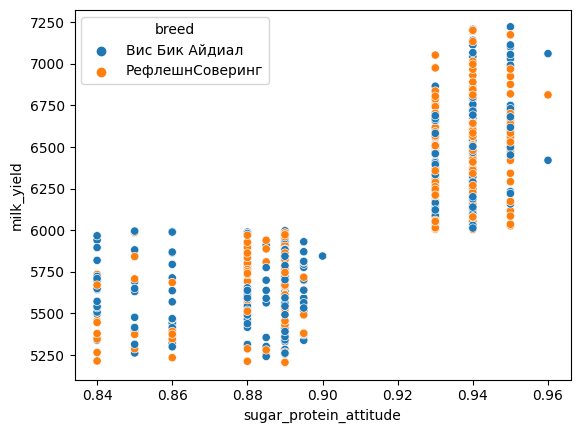

In [ ]:
sns.scatterplot(x='sugar_protein_attitude', y='milk_yield', data=ferma_main, hue='breed');

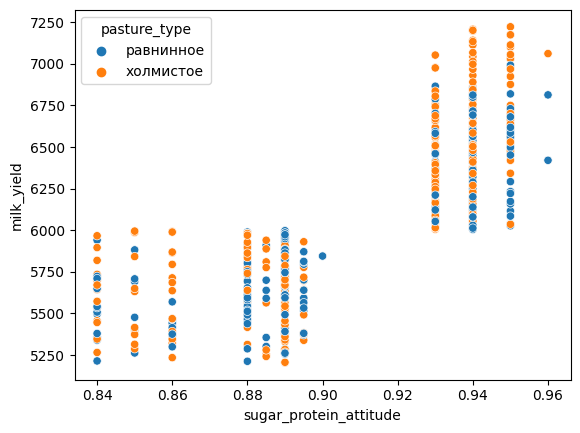

In [ ]:
sns.scatterplot(x='sugar_protein_attitude', y='milk_yield', data=ferma_main, hue='pasture_type');

в этой группе влияние обеих пород и типов пастбищ практически равноценное. Попробуем оценить связи нашего второго целевого признака (вкус молока) с другими признаками. Вкус молока складывается из очень многих факторов, безусловно здесь имеют значение жирность и содержание белка в молоке, тип питания коровы, в некоторой степени может влиять порода коровы (и папы), ее возраст.

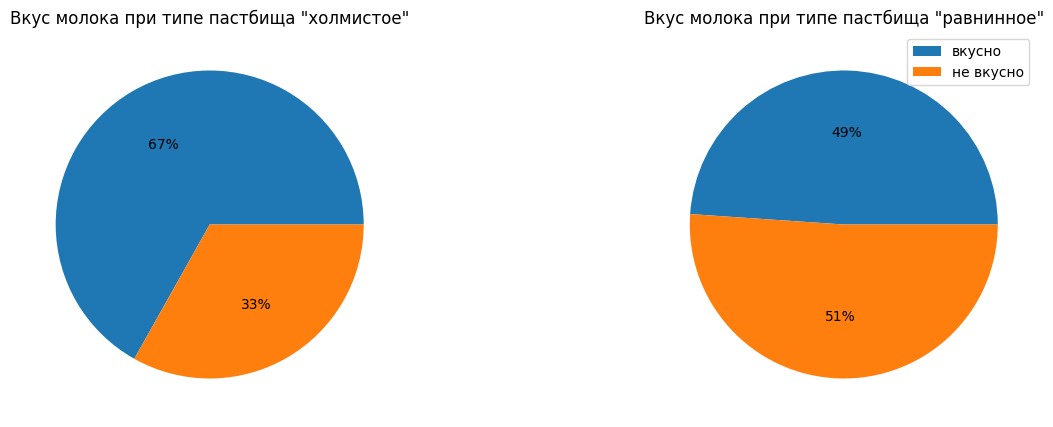

In [ ]:
t=ferma_main.query('pasture_type=="холмистое"').pivot_table(index='taste', values='id', aggfunc='count')
t1=ferma_main.query('pasture_type=="равнинное"').pivot_table(index='taste', values='id', aggfunc='count')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(data=t, x='id',  autopct='%1.0f%%')
ax1.set_title('Вкус молока при типе пастбища "холмистое"')
ax2.pie(data=t1, x='id', autopct='%1.0f%%')
ax2.set_title('Вкус молока при типе пастбища "равнинное"')
plt.legend(('вкусно', 'не вкусно'))
plt.show()

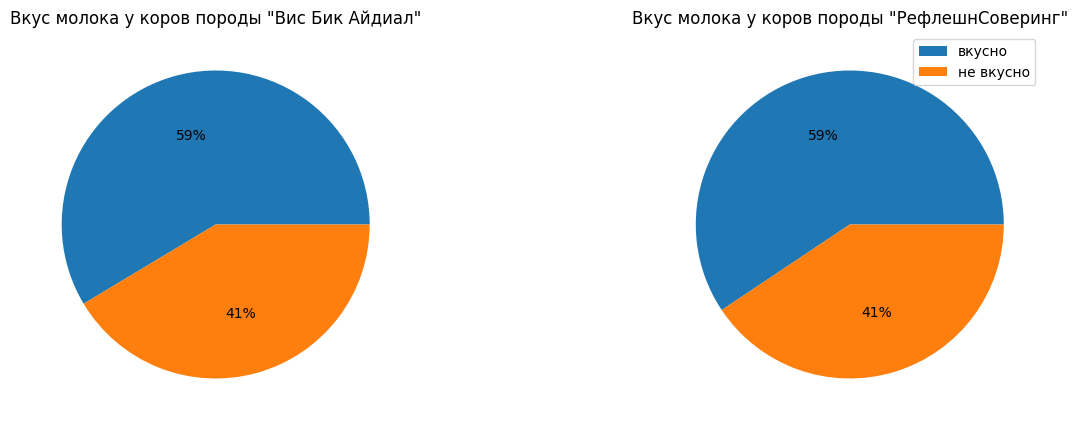

In [ ]:
t=ferma_main.query('breed=="Вис Бик Айдиал"').pivot_table(index='taste', values='id', aggfunc='count')
t1=ferma_main.query('breed=="РефлешнСоверинг"').pivot_table(index='taste', values='id', aggfunc='count')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(data=t, x='id',  autopct='%1.0f%%')
ax1.set_title('Вкус молока у коров породы "Вис Бик Айдиал"')
ax2.pie(data=t1, x='id', autopct='%1.0f%%')
ax2.set_title('Вкус молока у коров породы "РефлешнСоверинг"')
plt.legend(('вкусно', 'не вкусно'))
plt.show()

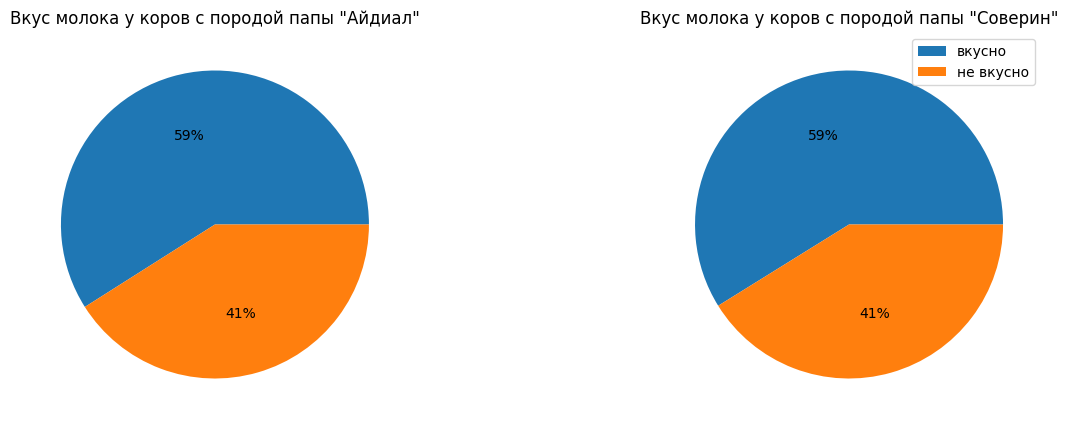

In [ ]:
t=ferma_main.query('father_breed=="Айдиал"').pivot_table(index='taste', values='id', aggfunc='count')
t1=ferma_main.query('father_breed=="Соверин"').pivot_table(index='taste', values='id', aggfunc='count')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(data=t, x='id',  autopct='%1.0f%%')
ax1.set_title('Вкус молока у коров с породой папы "Айдиал"')
ax2.pie(data=t1, x='id', autopct='%1.0f%%')
ax2.set_title('Вкус молока у коров с породой папы "Соверин"')
plt.legend(('вкусно', 'не вкусно'))
plt.show()

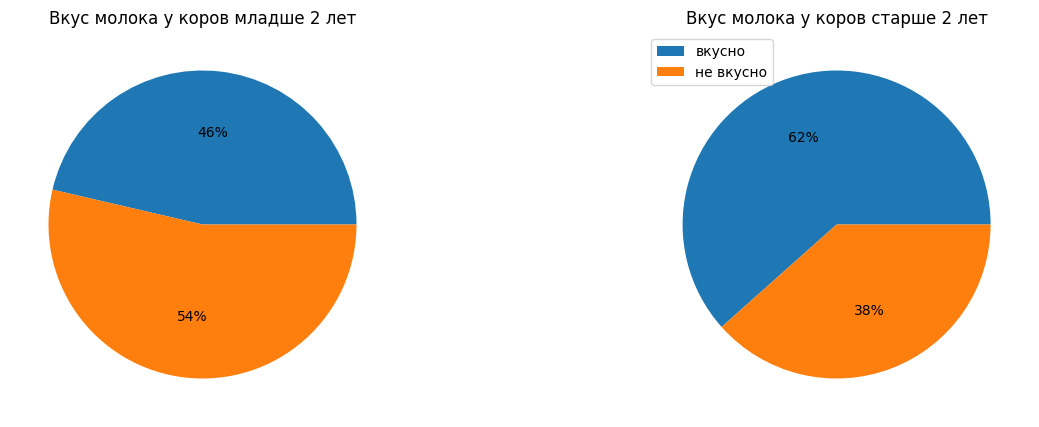

In [ ]:
t=ferma_main.query('age=="менее_2_лет"').pivot_table(index='taste', values='id', aggfunc='count')
t1=ferma_main.query('age=="более_2_лет"').pivot_table(index='taste', values='id', aggfunc='count')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(data=t, x='id',  autopct='%1.0f%%')
ax1.set_title('Вкус молока у коров младше 2 лет')
ax2.pie(data=t1, x='id', autopct='%1.0f%%')
ax2.set_title('Вкус молока у коров старше 2 лет')
plt.legend(('вкусно', 'не вкусно'))
plt.show()

Судя по графикам, вкусное молоко чаще бывает у коров старше 2 лет, пасущихся на холмистиых пастбищах с равной частотой распределения по породам

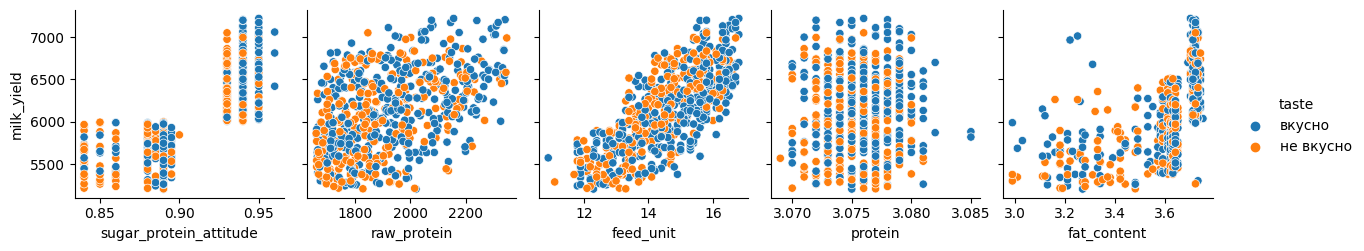

In [ ]:
sns.pairplot(data=ferma_main, x_vars=['sugar_protein_attitude', 'raw_protein', 'feed_unit', 'protein','fat_content'], y_vars='milk_yield', hue='taste');

данные графики позволяют сказать, что молоко вкуснее если корм более питательный, с более высоким сахарно-протеиновым отношением, а также более богатое жиром и белком

**Вывод по разделу:** удалось выявить сильную положительную корреляцию удоя молока с питательной ценностью корма, сахарно-протеиновым отношением корма и умеренную силу связи с содержанием сырого протеина в корме. Провели оценку корреляционных связей целевого (удой) и других входных количественных признаков (характеристики корма) с учетом типа пастбища и породы коров, выявили, что коровы с наибольшим удоем чаще пасутся на пастбищах холмистого типа. Провели предварительную оценку связей нашего второго целевого признака (вкус молока) с другими признаками. Вкус молока складывается из очень многих факторов, безусловно здесь имеют значение жирность и содержание белка в молоке, тип питания коровы, ее возраст, в некоторой степени может влиять порода коровы (и папы), однако наш анализ убедительно говорить о таком влиянии не позволяет. Переходим к подготовке данных и обучению моделей.

## 4. Обучение модели линейной регрессии

<a id='chapter_4'></a>

Подготовим данные датасета ferma_main.csv и обучим на них первую модель LinearRegression.

В качестве целевого используем признак удой (milk_yield).

Отберем признаки, которые подходят для модели линейной регрессии.

С целью прогнозирования удоя молока нам подойдут характеристики корма, коров, пастбищ.

Характеристики коровы: порода, порода папы быка, возраст.

Характеристики корма:  энергетическая кормовая единица, сырой протеин, сахаро-протеиновое соотношение.

Характеристика пастбища: Тип пастбища.

Для оптимизации кода зададим его функцией

In [ ]:
def linmodel(df):
    X = df.drop(drop_col_names, axis=1)
    y = df[purpose]
    RANDOM_STATE = 42
    global y_test, encoder, scaler, predictions, encoder_col_names, model_lr
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    encoder = OneHotEncoder(drop='first', sparse=False)
    scaler = StandardScaler()
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    encoder_col_names = encoder.get_feature_names_out()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)

In [ ]:
drop_col_names = ['id', 'fat_content', 'protein', 'taste', 'milk_yield']

In [ ]:
purpose ='milk_yield'
cat_col_names = ['breed', 'father_breed', 'pasture_type', 'age']
num_col_names = ['feed_unit',
                 'raw_protein',
                 'sugar_protein_attitude',
                  ]

In [ ]:
linmodel(ferma_main)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
residuals = y_test - predictions

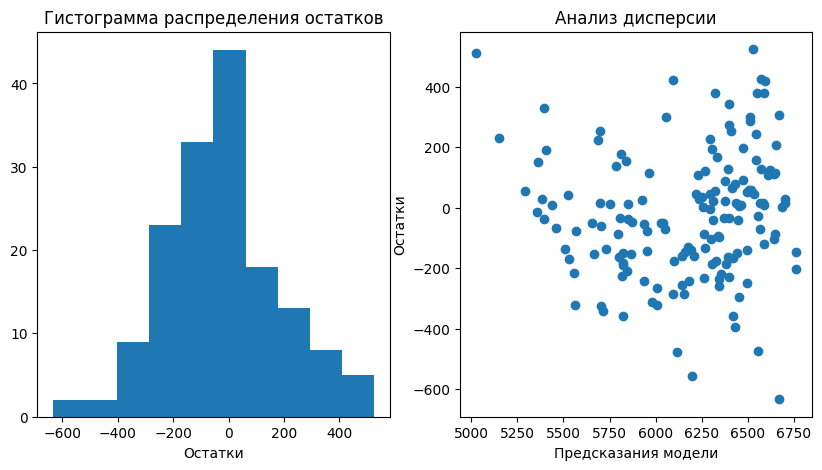

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x=residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals )
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [ ]:
r2 = r2_score(y_test, predictions)
print('r2_score:', r2)
mse = mean_squared_error(y_test, predictions)
print('mean_squared_error', mse)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('root_mean_squared_error', rmse)
mae = mean_absolute_error(y_test, predictions)
print('mean_absolute_error:', mae)

r2_score: 0.7844078173416967
mean_squared_error 43887.0150096605
root_mean_squared_error 209.49227911706078
mean_absolute_error: 164.2419446347492


Вывод по первой модели: судя по величине ошибок, модель ошибается в предсказании удоя примерно на 164-209кг, показатель r2 неплохой, но есть к чему стремиться, диаграмма распределения остатков немного скошенная и дисперсия не совсем равномерная, значит нашу модель стоит улучшить. Добиться этого можно добавлением новых признаков или изменением существующих.

Попробуем изменить некоторые существующие признаки чтобы сделать связь между ними и целевым признаком более линейной - преобразуем признак sugar_protein_attitude в категориальный биноминальный, а feed_unit возведем в квадрат.

Вывод по первой модели: судя по величине ошибок, модель ошибается в предсказании удоя примерно на 164-209кг, показатель r2 высокий, но  может быть улучшен. Анализ остатков модели: есть участки, где ошибки неустойчивы. До 5900 - один уровень разброса. Более - 5900 - разброс ошибки выше. Однозначно модель использовать нельзя - наблюдается гетероскедастичность (не постоянство дисперсии)

Гистограма: хороший колокол. Но есть локальные всплески, которые тоже говорят о том, что модель можно улучшать

Попробуем изменить некоторые существующие признаки чтобы сделать связь между ними и целевым признаком более линейной - преобразуем признак sugar_protein_attitude в категориальный биноминальный, а feed_unit возведем в квадрат.

In [ ]:
spo_threshold = 0.91
columns = []
columns.append('spo_'+str(spo_threshold))
ferma_main['spo_'+str(spo_threshold)] = ferma_main['sugar_protein_attitude'].apply(lambda x: 1 if x>spo_threshold else 0)

In [ ]:
ferma_main['feed_unit_sq'] = ferma_main['feed_unit']**2

In [ ]:
ferma_main.head(5)

,id,milk_yield,feed_unit,raw_protein,sugar_protein_attitude,breed,pasture_type,father_breed,fat_content,protein,taste,age,spo_0.91,feed_unit_sq
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84


In [ ]:
cat_col_names = ['breed', 'father_breed', 'pasture_type', 'age', 'spo_0.91']
num_col_names = ['feed_unit_sq',
                 'raw_protein',
                  ]

In [ ]:
linmodel(ferma_main)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
residuals = y_test - predictions

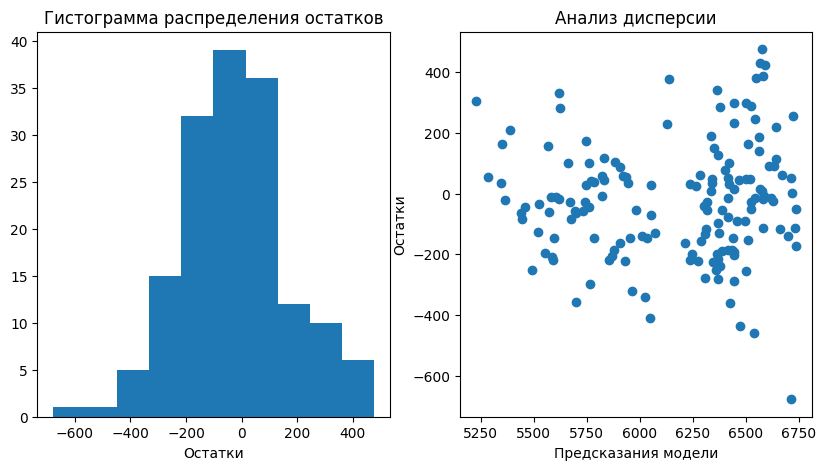

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x=residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals )
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [ ]:
r2 = r2_score(y_test, predictions)
print('r2_score:', r2)
mse = mean_squared_error(y_test, predictions)
print('mean_squared_error', mse)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('root_mean_squared_error', rmse)
mae = mean_absolute_error(y_test, predictions)
print('mean_absolute_error:', mae)

r2_score: 0.8180879926867501
mean_squared_error 37030.91131113697
root_mean_squared_error 192.43417396901458
mean_absolute_error: 149.03965222364604


Вывод по второй модели: проведенные изменения привели к более ровному распределению дисперсии остатков, повышению r2 на несколько пунктов. Анализ остатков модели: дисперсия разброса ошибки стала стабильнее на всём диапазане фактических данных, наблюдаются две зоны ошибок, но разница дисперсии ошибок не систематическая, а выборочная.

Гистограма: среднее и медиана совпадают, но распределение не нормальное (бимодальности, плюс смещение среднего влево от нуля). Значит потенциал для улучшения модели всё ещё есть.

Общий вывод: Модель уже пригодна для прогнозирования. Добавим еще один входной признак - имя папы и запустим третью модель

In [ ]:
merged_df = pd.merge(ferma_main, ferma_dad, how='left', on='id')

In [ ]:
cat_col_names = ['breed', 'father_breed', 'pasture_type', 'age', 'spo_0.91', 'father_name']
num_col_names = ['feed_unit_sq',
                 'raw_protein',
                  ]

In [ ]:
linmodel(merged_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
residuals = y_test - predictions

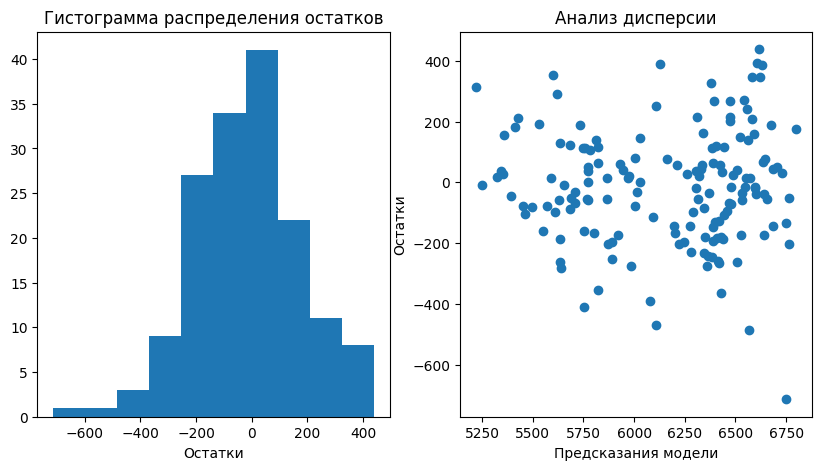

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x=residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals )
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [ ]:
r2 = r2_score(y_test, predictions)
print('r2_score:', r2)
mse = mean_squared_error(y_test, predictions)
print('mean_squared_error', mse)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('root_mean_squared_error', rmse)
mae = mean_absolute_error(y_test, predictions)
print('mean_absolute_error:', mae)

r2_score: 0.8247542745210407
mean_squared_error 35673.88988618193
root_mean_squared_error 188.87532895055915
mean_absolute_error: 146.16302445362314


Вывод по третьей модели: после добавления нового признака несколько уменьшились ошибки предсказания, показатель r2 достиг 82%. Анализ остатков модели: дисперсия разброса ошибки осталась стабильной. Есть около десятка "выдающихся" точек на высоких удоях,  несмотря на это можем сказать что ошибка равномерная на всём диапазоне значений. Т.е. остатки - гомоскедастичны. Это важно. Значит модель МОЖНО использовать для прогноза.

Гистограма: среднее и медиана совпадают, не смещены относительно 0. Но бимодальность присутствуют.

Общий вывод: Потенциал для улучшения модели всё ещё есть, но на текущий момент признаём модель качественной (остатки гомоскедастичны) и пригодной для работы. Посмотрим на точность модели.

Сравнительная оценка моделей: сравнение метрик показывает, что третья модель является лучшей по всем показателям. Ее и будем использовать. Рассчитаем доверительный интервал прогноза модели:

In [ ]:
np.quantile(predictions, 0.025) , np.quantile(predictions, 0.975)

(5351.318280574307, 6749.077628641808)

С 95%-й вероятностью модель прогнозирует удой от 5351 до 6749кг.

Переходим к прогнозированию удоя на датасете cow_buy с помощью 3й модели. Первым этапом заполним недостающими данными датасет для приведения его к такому же формату как у тренировочного.

In [ ]:
average_values = ferma_main[['feed_unit', 'raw_protein', 'sugar_protein_attitude']].mean()

In [ ]:
cow_buy['feed_unit'] = average_values['feed_unit']*1.05

In [ ]:
cow_buy['raw_protein'] = average_values['raw_protein']*1.05

In [ ]:
cow_buy['sugar_protein_attitude'] = average_values['sugar_protein_attitude']*1.05

In [ ]:
cow_buy['feed_unit_sq'] = cow_buy['feed_unit']**2

In [ ]:
spo_threshold = 0.91
columns = []
columns.append('spo_'+str(spo_threshold))
cow_buy['spo_'+str(spo_threshold)] = cow_buy['sugar_protein_attitude'].apply(lambda x: 1 if x>spo_threshold else 0)

In [ ]:
merged_df.head(5)

,id,milk_yield,feed_unit,raw_protein,sugar_protein_attitude,breed,pasture_type,father_breed,fat_content,protein,taste,age,spo_0.91,feed_unit_sq,father_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [ ]:
cow_buy.head(5)

,breed,pasture_type,father_breed,father_name,fat_content,protein,age,feed_unit,raw_protein,sugar_protein_attitude,feed_unit_sq,spo_0.91
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1


Все нужные колонки на месте, переходим к составлению модели для прогноза

In [ ]:
drop_col_names =['fat_content', 'protein', 'sugar_protein_attitude', 'feed_unit']
X_test = cow_buy.drop(drop_col_names, axis=1)

In [ ]:
cat_col_names = ['breed', 'father_breed', 'pasture_type', 'age', 'spo_0.91', 'father_name']
X_test_ohe = encoder.transform(X_test[cat_col_names])
num_col_names = ['feed_unit_sq','raw_protein']
X_test_scaled = scaler.transform(X_test[num_col_names])

In [ ]:
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [ ]:
predictions = model_lr.predict(X_test)

In [ ]:
predictions

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6609.91929681, 6571.25973712,
       6283.99977532, 6400.54066779, 6344.70785976, 6617.92892634,
       6609.91929681, 6127.4747423 , 6283.99977532, 6593.08937654,
       6344.70785976, 6425.38021759, 6571.25973712, 6542.14606633])

Для всех 20 коров в датасете модель прогнозирует достаточный по критериям фермера удой

**Вывод по разделу:** проведена подготовка данных для машинного обучения, создано и протестировано 3 модели линейной регрессии, изучены метрики каждой, на основании сравнения метрик выбрана лучшая (третья), на ней получен прогноз удоя молока для планируемых к покупке коров. Согласно прогнозу все отобранные коровы могут дать достаточный по критериям фермера удой.
Для прогнозирования вкуса молока переходим к разработке модели логистической регрессии.

## 5. Обучение модели логистической регрессии

<a id='chapter_5'></a>

Для получения прогноза вкуса молока подготовим данные датасета и обучим на них модель LogisticRegression.
В качестве целевого используем признак вкус молока (taste). Так как на вкус молока могут влиять все признаки, имеющиеся в нашем распоряжении, то будем использовать их все. Первым этапом переведем целевой признак в цифровой бинарный формат.

In [ ]:
merged_df['taste'] = merged_df['taste'].replace(regex={'не вкусно': '0', 'вкусно': '1'}).astype(int)

In [ ]:
merged_df.head(5)

,id,milk_yield,feed_unit,raw_protein,sugar_protein_attitude,breed,pasture_type,father_breed,fat_content,protein,taste,age,spo_0.91,feed_unit_sq,father_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,1,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,1,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,0,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,0,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,1,менее_2_лет,0,163.84,Барин


In [ ]:
drop_col_names =['sugar_protein_attitude', 'milk_yield','id','taste']
X =  merged_df.drop(drop_col_names, axis=1)
y = merged_df['taste']

In [ ]:
RANDOM_STATE = 90123
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE, test_size=0.2)

In [ ]:
cat_col_names = ['age', 'pasture_type', 'father_breed', 'spo_0.91', 'father_name', 'breed']
num_col_names = ['protein', 'raw_protein', 'fat_content', 'feed_unit', 'feed_unit_sq']

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [ ]:
clf_lr = LogisticRegression()
clf_lr = clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.6031746031746031

In [ ]:
for feature_number, feature_name in enumerate(X.columns):
    exp_weight = math.exp(clf_lr.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

feed_unit           : +0.81
raw_protein         : +1.86
breed               : +1.00
pasture_type        : +0.36
father_breed        : +1.05
fat_content         : +0.67
protein             : +0.77
age                 : +1.08
spo_0.91            : +1.32
feed_unit_sq        : +1.22
father_name         : +0.95


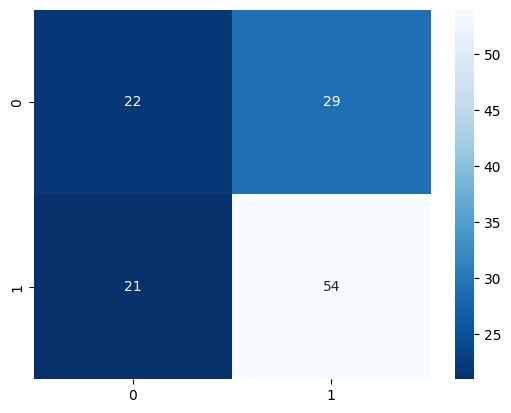

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

In [ ]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.72
precision:  0.651


Так как целью фермера является покупка коров, дающих только вкусное молоко, приобретение коров, дающих невкусное молоко менее благоприятно, чем упустить несколько коров, дающих вкусное молоко. Таким образом, главная цель модели -свести к нулю количество ложноположительных результатов, то есть доведение precision до 1.

In [ ]:
threshold = 0.75
y_pred = np.where(clf_lr.predict_proba(X_test)[:,1] > threshold, 1, 0)

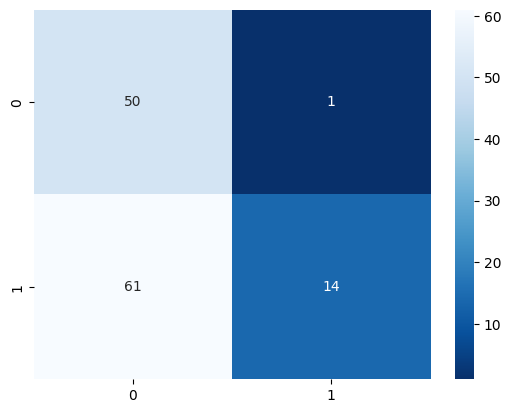

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

при таком пороге (0.75) вероятность купить корову с невкусным молоком почти нулевая, но и шансы пополнить поголовье ввиду жесткости порога невелики

In [ ]:

X_test = cow_buy


In [ ]:
cat_col_names = ['age', 'pasture_type', 'father_breed', 'spo_0.91', 'father_name', 'breed']
num_col_names = ['protein', 'raw_protein', 'fat_content', 'feed_unit', 'feed_unit_sq']
X_test_ohe = encoder.transform(X_test[cat_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [ ]:
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [ ]:
y_pred = np.where(clf_lr.predict_proba(X_test)[:,1] > threshold, 1, 0)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Вывод по разделу: согласно предсказанию модели, из 20 коров только одна подходит под требования фермера - удой более 6000кг и вкусное молоко.

In [ ]:
cow_buy['milk_yield']=predictions
cow_buy['taste']=y_pred
cow_buy

,breed,pasture_type,father_breed,father_name,fat_content,protein,age,feed_unit,raw_protein,sugar_protein_attitude,feed_unit_sq,spo_0.91,milk_yield,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6609.919297,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6378.711028,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6283.999775,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6593.089377,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6542.146066,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6425.380218,0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6609.919297,0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6571.259737,0
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6283.999775,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6400.540668,1


In [ ]:
cow_buy.query('milk_yield>6000 and taste==1')

,breed,pasture_type,father_breed,father_name,fat_content,protein,age,feed_unit,raw_protein,sugar_protein_attitude,feed_unit_sq,spo_0.91,milk_yield,taste
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.4,3.079,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1,6400.540668,1


## Итоговые выводы

<a id='chapter_6'></a>

 В этом проекте мы провели работу по предсказанию целевых признаков: одного количественного, второго категориального. Для того, чтобы прийти к результату были проделаны следующие этапы:

 1. Первым этапом выполнена загрузка библиотек и датасетов, изучена общая информация о данных. Общая информация показала, что в датасете с данными фермы имеется 634 строки, пропущенных значений нет, но не все форматы данных соответствуют необходимым для данного параметра. Во второй таблице с данными о быках 629 строк, пропущенных значений нет, форматы данных соответствующие. В третьей таблице с данными от ассоциации пастбищ 20 строк, пропущенных значений нет, но как и в первой таблице имеют неподходящие форматы данных.

 2. На этапе предобработки данных мы изменили имена колонок, проверили данные на явные и неявные дубликаты. Сильно выдающееся значение в столбце удой было удалено.

 3. Следующим этапом исследовательский анализ данных, посмотрели распределение данных в таблицах, по итогам анализа можно сказать, что данные выглядят достоверно, особых выбросов нет, но не все признаки имеют нормальное распределение.

4. На этапе корреляционного анализа мы изучили взаимосвязи между целевым признаком удой и входными количественными признаками отдельно для коров с вкусным и невкусным молоком, обнаружили умеренную вариативность коэффициентов в подгруппах, нашли признаки высокой прямой связи между удоем и характеристиками корма (питательность и сахарно-протеиновое отношение, что позволило нам использовать линейную регрессию для обучения модели. Гораздо слабее связь между удоем и сырым протеином в корме, но она тоже есть. Кроме того, мы посмотрели на связь между удоем и категориальными признаками и обнаружили, что имеется связь между удоем и типом пастбища, породой папы коровы, возрастом коровы. Мы еще изучили связи между вторым целевым признаком (вкус молока) и другими категориальными признаками. Выяснили, что вкус зависит от типа пастбища и возраста коровы.

5. Мы обучили три модели линейной регрессии по предсказанию целевого признака (удой молока). В первой модели мы использовали данные, как в изначальном датасете, но исключили те, которые не влияют на удой. Точность модели получилась 78%, во второй модели мы траснформировали 2 входных признака, чтобы нивелировать нелинейности из взаимосвязи с удоем. Точность второй модели повысилась до 81.8%, а средняя ошибка уменьшилась. В третьей модели мы добавили данные еще одного признака (имя папы коровы), точность третьей модели достигла 82.5%, а средняя ошибка стала еще ниже. Используя третью модель, мы предсказали удои для выборки коров, из которых фермер будет выбирать себе коров для покупки.

6. Мы обучили модель методом логистической регрессии, чтобы предсказать вкус молока у коров, которых фермеру предлагает "Экоферма". Для того, чтобы получить результаты, устраивающие фермера, мы использовали метрику precision и  изменение порога классификации, чтобы минимизировать возможность ошибки первого рода. В результате модель выбрала только тех коров, у которых точно будет вкусное молоко.

 В итоге мы выбрали одну корову, которую фермер может взять с минимальным риском для себя.

 Для того, чтобы получить более достоверные данные по итогам машинного обучения, на мой взгляд, необходимо расширить набор признаков, влияющих на целевые признаки и увеличить размера датасета.